# Instacart Project Summary

**Instacart is a grocery delivery platform** where customers can place a grocery order and have it delivered to them, similar to how Uber Eats and Door Dash work. In this project, I will be working with a dataset that was publicly released by Instacart in a 2017 for a Kaggle competition.

**The goal of this project** is to clean up the data and prepare a report that gives insight into the shopping habits of Instacart customers. 

There are five tables in the enitre Instantcart dataset. These tables provide information on what a user orders, when they order, and what products are in the users orders.  

For my exploratory data analysis, I will be performing the following steps - 

- **Step 1**: Read in the data files
- **Step 2**: Preprocess the data by doing the following:
  - Verify and fix data types (e.g. make sure ID columns are integers)
  - Identify and fill in missing values
  - Identify and remove duplicate values
- **Step 3**: Once the data is processed and ready for analysis, I will provide insights around user behavior on the app. 

Please see my findings below. 

# Library Imports

In [1]:
# Import libraries required for this project
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Read in Tables

In [2]:
# Read in Tables 
# splits on ; not ,

# ingest orders dataframe 
orders = pd.read_csv('/datasets/instacart_orders.csv', sep = ';')

# ingest products dataframe 
products = pd.read_csv('/datasets/products.csv', sep = ';')

# ingest departments dataframe 
departments = pd.read_csv('/datasets/departments.csv', sep = ';')

# ingest departments dataframe 
aisles = pd.read_csv('/datasets/aisles.csv', sep = ';')

# ingest departments dataframe 
order_products = pd.read_csv('/datasets/order_products.csv', sep = ';')


# Print head of each table to get a sense of what each data frame looks like
# print(orders.head()) 
# print(products.head()) 
# print(departments.head()) 
# print(aisles.head()) 
# print(order_products.head()) 

## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [3]:
# Check for duplicated orders by looking for duplicates in order id. Sort by order id to see duplicated rows next to eachother

# Return 10 rows to see duplicated order ids
orders[orders.duplicated(keep=False)].sort_values(by='order_id').head(10)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
354993,391768,57671,19,3,2,10.0
371905,391768,57671,19,3,2,10.0
119251,408114,68324,4,3,2,18.0
321100,408114,68324,4,3,2,18.0
394347,467134,63189,21,3,2,2.0
250626,467134,63189,21,3,2,2.0
99462,794638,50898,24,3,2,2.0
145574,794638,50898,24,3,2,2.0
311713,1021560,53767,3,3,2,9.0
242618,1021560,53767,3,3,2,9.0


In [4]:
# Check for all orders placed Wednesday at 2:00 AM

# If Monday = 0 -> Wednesday = 2

# Return/print all rows that meet condition 
orders.query("order_dow == 3 and order_hour_of_day == 2") 

# Determines Total Count of Orders
# orders.query("order_dow == 2 and order_hour_of_day == 2")['order_id'].count()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


Outcome -> There were 136 orders that happened on Wednesday at 2 AM

In [5]:
# Remove duplicate orders

# Remove duplicated order ids and set inplace to true to overwrite changes
orders.drop_duplicates(subset=['order_id'], inplace=True)

In [6]:
# Double check for duplicate rows

# Using same logic as I did earlier. 
# Outcome -> No longer returns duplicate order ids
orders[orders.duplicated(keep=False)].sort_values(by='order_id')

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


In [7]:
# Double check for duplicate order IDs only
orders[orders.duplicated(subset=['order_id'], keep=False)].sort_values(by='order_id')

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


### `products` data frame

In [8]:
# Check for fully duplicate rows
products[products.duplicated(keep=False)]

,product_id,product_name,aisle_id,department_id


In [9]:
# Check for just duplicate product IDs
products[products.duplicated(subset=['product_id'], keep=False)].sort_values(by='product_id')

,product_id,product_name,aisle_id,department_id


Outcome -> No fully duplicated rows or duplicated product ids

In [10]:
# Check for just duplicate product names (convert names to lowercase to compare better)

#Create a column in the df that converts product name to be lowercase
products['lower_product_name'] = products['product_name'].str.lower()

#Check for dupes on lowered product name column
products[products.duplicated(subset=['lower_product_name'], keep=False)].sort_values(by='lower_product_name')

,product_id,product_name,aisle_id,department_id,lower_product_name
23339,23340,18-in-1 Hemp Peppermint Pure-Castile Soap,25,11,18-in-1 hemp peppermint pure-castile soap
31844,31845,18-In-1 Hemp Peppermint Pure-Castile Soap,25,11,18-in-1 hemp peppermint pure-castile soap
19941,19942,Aged Balsamic Vinegar Of Modena,19,13,aged balsamic vinegar of modena
13152,13153,Aged Balsamic Vinegar of Modena,19,13,aged balsamic vinegar of modena
24830,24831,Albacore Solid White Tuna in Water,95,15,albacore solid white tuna in water
...,...,...,...,...,...
49552,49553,NaN,100,21,NaN
49574,49575,NaN,100,21,NaN
49640,49641,NaN,100,21,NaN
49663,49664,NaN,100,21,NaN


Outcome -> 
- There are product names that are duplicated but have different product ids
- There are also missing product names for some product ids

In [11]:
# Check for duplicate product names that aren't missing

# Filter out null values from product table
products = products[products['lower_product_name'].notnull()]

# Check again for duplicates in the lower_product_name column
products[products.duplicated(subset=['lower_product_name'], keep=False)].sort_values(by='lower_product_name')

,product_id,product_name,aisle_id,department_id,lower_product_name
23339,23340,18-in-1 Hemp Peppermint Pure-Castile Soap,25,11,18-in-1 hemp peppermint pure-castile soap
31844,31845,18-In-1 Hemp Peppermint Pure-Castile Soap,25,11,18-in-1 hemp peppermint pure-castile soap
19941,19942,Aged Balsamic Vinegar Of Modena,19,13,aged balsamic vinegar of modena
13152,13153,Aged Balsamic Vinegar of Modena,19,13,aged balsamic vinegar of modena
24830,24831,Albacore Solid White Tuna in Water,95,15,albacore solid white tuna in water
...,...,...,...,...,...
46873,46874,Vitamin D3 5000 IU,47,11,vitamin d3 5000 iu
21366,21367,Wild Sardines in Spring Water,95,15,wild sardines in spring water
40093,40094,Wild Sardines In Spring Water,95,15,wild sardines in spring water
1826,1827,Yams Cut Sweet Potatoes in Syrup,81,15,yams cut sweet potatoes in syrup


Outcome -> Even after removing missing product names, there are duplicated product names

### `departments` data frame

In [12]:
# Not requested but check for duplicates
departments[departments.duplicated(subset=['department'], keep=False)].sort_values(by='department')
departments[departments.duplicated(subset=['department_id'], keep=False)].sort_values(by='department_id')

# Check for missing values
departments.isna().sum()

department_id    0
department       0
dtype: int64

Outcome -> No duplicates found in either field of departments df and no missing values in this dataframe

### `aisles` data frame

In [13]:
# Not requested but check for duplicates
aisles[aisles.duplicated(subset=['aisle'], keep=False)].sort_values(by='aisle')
aisles[aisles.duplicated(subset=['aisle_id'], keep=False)].sort_values(by='aisle_id')

# Check for missing values
aisles.isna().sum()
# Outcome -> No duplicates found in either field

aisle_id    0
aisle       0
dtype: int64

Outcome -> No duplicates found in either field of aisles df and no missing values in this dataframe

### `order_products` data frame

In [14]:
# Check for fully duplicate rows
order_products[order_products.duplicated(keep=False)]

,order_id,product_id,add_to_cart_order,reordered


In [15]:
# Double check for any other tricky duplicates

# Check for duplicates in the set of columns 'order_id' and 'product_id'
print(order_products[order_products.duplicated(subset=['order_id', 'product_id'], keep=False)])

Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []


Outcome -> No duplicates found in this combination of fields in order_products df

## Find and remove missing values


### `products` data frame

In [16]:
# Are all of the missing product names associated with aisle ID 100?

# Filter df to only include missing vales 
# Group by aisle id and department id and count missing values
products[products['product_name'].isna()].groupby(by = ['aisle_id','department_id']).count()


,,product_id,product_name,lower_product_name
aisle_id,department_id,,,


In [17]:
# Are all of the missing product names associated with department ID 21?

# Filter df to only include missing vales 
# Group by aisle id and department id and count missing values
products[products['product_name'].isna()].groupby(by = ['aisle_id','department_id']).count()


,,product_id,product_name,lower_product_name
aisle_id,department_id,,,


In [18]:
# What is this ailse and department?

# Easy option is to look up these values in the aisle and department tables
# More complex option is to join to aisle and department tables to get the names of these aisles and departments
# Taking the easy option at the moment 

# Which aisle is aisle id 100
print(aisles[aisles['aisle_id'] == 100])

#Which department is department id 21
print(departments[departments['department_id'] == 21])


    aisle_id    aisle
99       100  missing
    department_id department
20             21    missing


Outcome -> When checking for missing product names in the products df
- All of the missing product names are associated with aisle ID 100
- All missing product names are associated with department ID 21
- When checking the name of both of these department and aisle ids, both aisle_id = 100 and department_id = 21 return 'missing' as their respective name

In the next step, going to replace missing values with the string 'Unknown'

In [19]:
# Fill missing product names with 'Unknown'
products['product_name'] = products['product_name'].fillna('Unknown')

# Check to see if there are still any missing product names 
products[products['product_name'].isna()]

,product_id,product_name,aisle_id,department_id,lower_product_name


Outcome -> There are no longer missing product names after replacing the missing values with the string 'Unknown'

### `orders` data frame

In [20]:
# Are there any missing values where it's not a customer's first order?

# Assumption -> When the order number is greater than 1 then the customer has already placed their first order
orders[orders['order_number'] > 1].isnull().sum()

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

Outcome -> There aren't any missing values in any column of the orders df where it's not a customer's first order

### `order_products` data frame

In [21]:
# What are the min and max values in this column?

# Assuming that you're asking to take the min and max of add_to_cart_order?

print('The min of add_to_cart_order is', order_products['add_to_cart_order'].min())
print('The max of add_to_cart_order is', order_products['add_to_cart_order'].max())

The min of add_to_cart_order is 1.0
The max of add_to_cart_order is 64.0


In [22]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
# Assumption -> This means to create a list of order ids with a least one missing value in 'add_to_cart_order'

# Determine which orders have a missing value in them 
order_ids = order_products[order_products['add_to_cart_order'].isnull()].reset_index(drop=True)

# Get the distinct order ids that have at least one missing value in them
order_ids = order_ids['order_id'].unique()

# Print list of those order ids
order_ids

array([2449164, 1968313, 2926893, 1717990, 1959075,  844733,   61355,
        936852,  264710, 1564093,  129627,  293169, 2849370, 1386261,
       3308010,  903110, 2136777, 3347453, 1888628,  165801, 2094761,
       1038146, 2997021,  813364, 2256933,  171934, 2409109, 1730767,
       1169835,  733526,  404157, 3125735,  747668, 1800005, 1961723,
        871281,  388234, 1648217, 1477139,  102236, 1021563, 1832957,
       2721963,  678116, 1220886, 1673227, 2999801, 1633337, 2470674,
       2625444, 1677118, 2479011, 3383594, 1183255, 1713430, 2652650,
       1598369, 1916118,  854647, 1302315,  888470,  180546, 2621907,
       1308785, 2729254,    9310, 2170451, 2979697, 1625713, 1529171])

In [23]:
# Do all orders with missing values have more than 64 products?

# Get order ids with at least one missing value in add_to_cart_order
orders_ids = order_products[order_products['add_to_cart_order'].isna()]['order_id'].unique()

# Return dataframe of orders where the order ids are the ids with missing values
order_info = order_products[order_products['order_id'].isin(order_ids)]

# Count the number of products in each order
products_per_order = order_info.groupby('order_id')['product_id'].count().sort_values()

#Check if there are any orders with less than 64 products
products_per_order.min()

# Outcome -> The lowest number of products in an order with missing values is 65

65

Outcome -> When there are missing values in the order_products df, all of those orders have more than 65 items in the order. We see that when the values aren't missing, the most items added to an order is 64 items.

In [24]:
# Replace missing values with 999 and convert column to integer type

# Fill missing values with 999 and then convert column to int
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999).astype(np.int64)

# Check if series converted from float to int -> Confirmed that converted to interger
order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB


# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [25]:
# Validating 'order_hour_of_day' first
# Return table that contains order_hour_of_day less than 0 or greater than 23
print(orders[(0 < orders['order_hour_of_day']) & (orders['order_hour_of_day'] > 23)])

# Return unique values in order_hour_of_day sorted from low to high to visually check the values 
print(sorted(orders['order_hour_of_day'].unique()))

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [26]:
# Validating 'order_dow' second
#Return table that contains day of week less than 0 or greater than 6
print(orders[(0 < orders['order_dow']) & (orders['order_dow'] > 6)])

#Return unique values in order_dow sorted from low to high to visually check the values 
sorted(orders['order_dow'].unique())

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


[0, 1, 2, 3, 4, 5, 6]

Outcome -> Verified that orders['order_hour_of_day'] is between 0 and 23
Outcome -> Verified that orders['order_dow'] is between 0 and 6

### [A2] What time of day do people shop for groceries?

The most popular time of the day to shop is 10 am


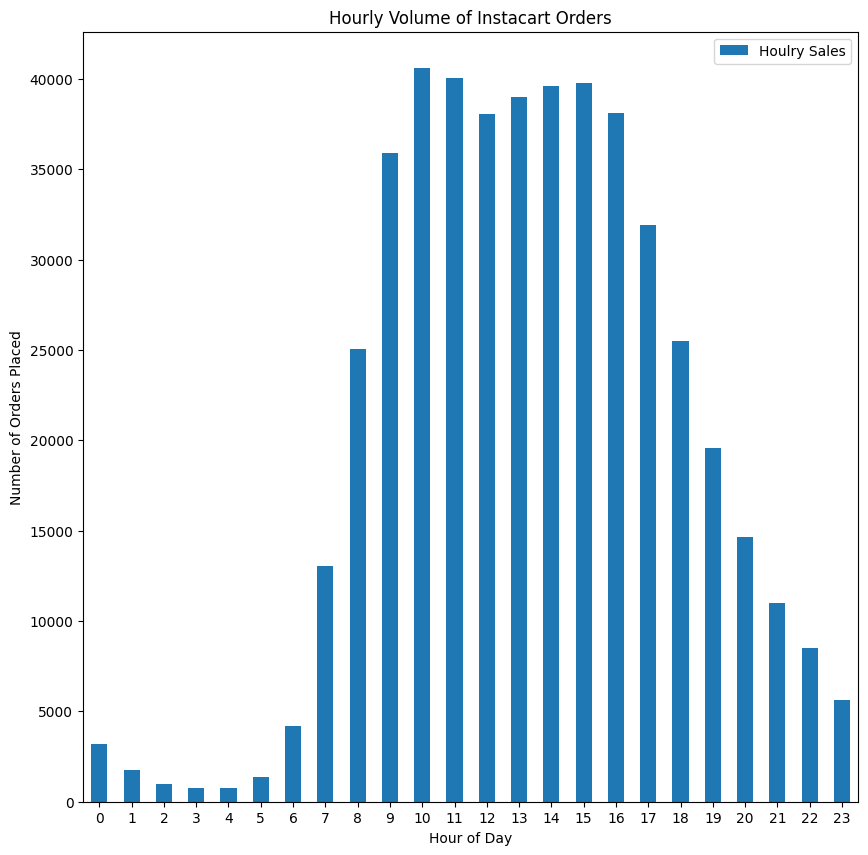

In [27]:
# The most popular time of day to shop 

# Assumption -> The hour with the highest volume of orders will be the most popular time to shop for groceries
hourly_max = orders.groupby('order_hour_of_day')['order_id'].count().idxmax()

# Output the most popular time of the day to shop
print('The most popular time of the day to shop is', hourly_max, 'am')

# Save order count by hour to hourly_orders dataframe for viz
hourly_orders = orders.groupby('order_hour_of_day')['order_id'].count().to_frame().reset_index()

# Plot bar chart for hourly sales 
# Set configs for bar chart 
hourly_orders.plot(x = 'order_hour_of_day'
                         , y = 'order_id'
                         , title = 'Hourly Volume of Instacart Orders'
                         , xlabel = 'Hour of Day'
                         , ylabel = 'Number of Orders Placed'
                         , kind = 'bar'
                         , rot = 0
                         , figsize=(10,10)
                         )

# Change legend/series titles
plt.legend(['Houlry Sales'])

# Show bar chart
plt.show() 


### [A3] What day of the week do people shop for groceries?

The most popular time of the week to shop is Monday


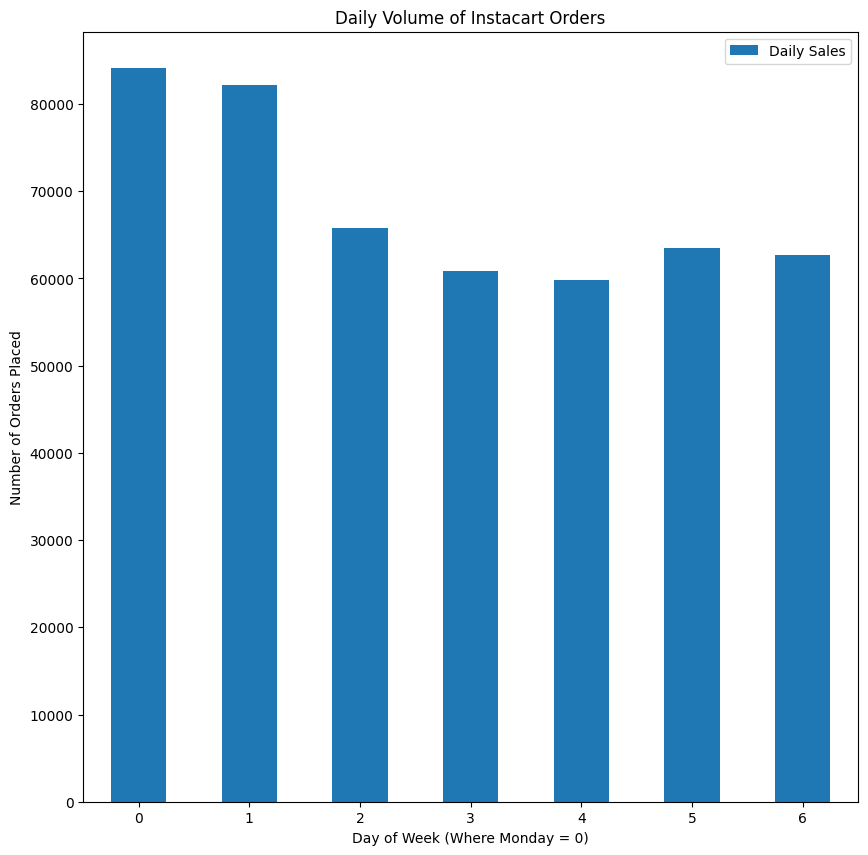

In [28]:
# The most popular day of the week to shop 

# Assumption -> The day with the highest volume of orders will be the most popular day to shop for groceries
daily_max = orders.groupby('order_dow')['order_id'].count().idxmax()

print('The most popular time of the week to shop is Monday')
      
daily_orders = orders.groupby('order_dow')['order_id'].count().to_frame().reset_index()

# Plot bar chart for hourly sales 
# Set configs for bar chart 
daily_orders.plot(x = 'order_dow'
                      , y = 'order_id'
                      , title = 'Daily Volume of Instacart Orders'
                      , xlabel = 'Day of Week (Where Monday = 0)'
                      , ylabel = 'Number of Orders Placed'
                      , kind = 'bar'
                      , rot = 0
                      , figsize=(10,10)
                      )

# Change legend/series titles
plt.legend(['Daily Sales'])

# Show bar chart
plt.show() 

### [A4] How long do people wait until placing another order?

For those users that place multiple orders, on average people tend to wait 11.1 days until placing another order


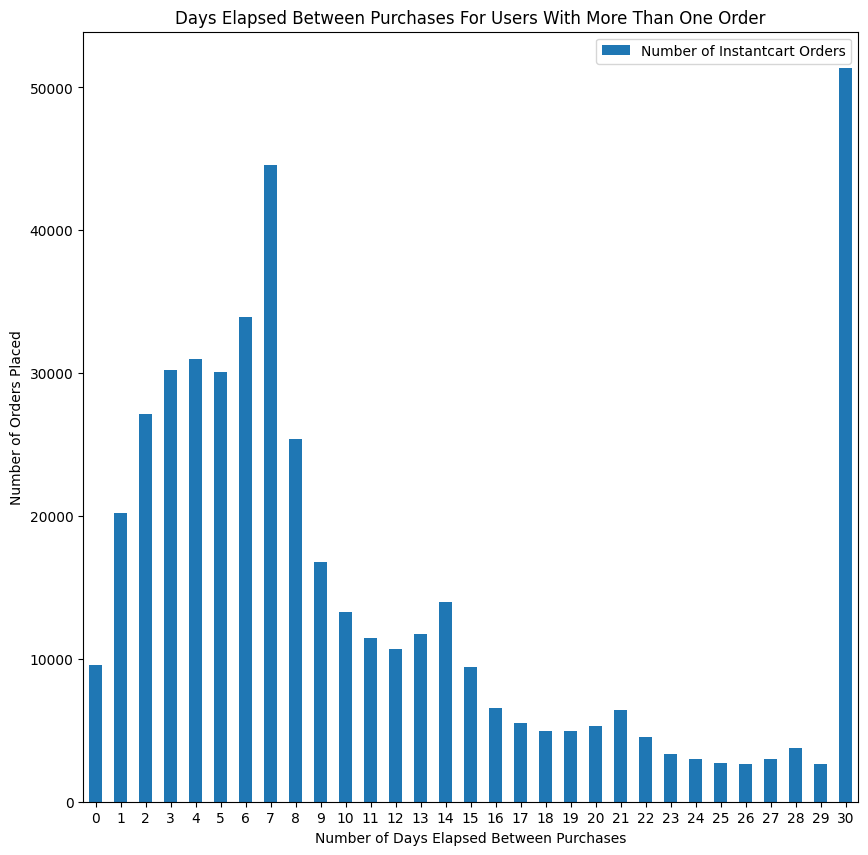

In [29]:
# 'days_since_prior_order' in orders df is the number of days since this customer placed their previous order
# It is possible that days_since_prior_order is null, but the mean calculation ignores these rows
# Check if days_since_prior_order can be null # orders[orders['days_since_prior_order'].isnull()]

print('For those users that place multiple orders, on average people tend to wait', round(orders['days_since_prior_order'].mean(),1) , 'days until placing another order')

# Going to include order rows where users have placed more than 1 order
two_or_more_orders = orders[orders['order_number'] > 1]

# Create varaible order_days_elapsed and pass df of days elapsed since last order for each order id
order_days_elapsed = two_or_more_orders.groupby('days_since_prior_order')['order_id'].count().to_frame().reset_index()

# Convert days_since_prior_order to int to remove decimal in x-axis and clean up viz
order_days_elapsed['days_since_prior_order'] = order_days_elapsed['days_since_prior_order'].astype('Int64', errors='ignore')

# Plot bar chart for hourly sales 
# Set configs for bar chart 
order_days_elapsed.plot(x = 'days_since_prior_order'
                      , y = 'order_id'
                      , title = 'Days Elapsed Between Purchases For Users With More Than One Order'
                      , xlabel = 'Number of Days Elapsed Between Purchases'
                      , ylabel = 'Number of Orders Placed'
                      , kind = 'bar'
                      , rot = 0
                      , figsize=(10,10)
                      )

# Change legend/series titles
plt.legend(['Number of Instantcart Orders'])

# Show bar chart
plt.show()

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

In [30]:
# Completing 2.8 over the next 3 cells

# Wednesdays
wednesday = orders[orders['order_dow'] == 2]
wed_orders = wednesday.groupby('order_hour_of_day')['order_id'].count().to_frame().reset_index()
#print(wed_orders.head())

# Saturdays
saturday = orders[orders['order_dow'] == 5]
sat_orders = saturday.groupby('order_hour_of_day')['order_id'].count().to_frame().reset_index()
#print(sat_orders.head())


In [31]:
# Merge wednesday and saturday orders on hour of the day assuming that each df has 0-23 as index

hourly_sales_by_day = sat_orders.merge(wed_orders
                              , how = 'inner'
                              , on = 'order_hour_of_day'
                              ).rename(columns={"order_id_x": "saturday_sales", "order_id_y": "wednesday_sales"})

#print(hourly_sales_by_day)

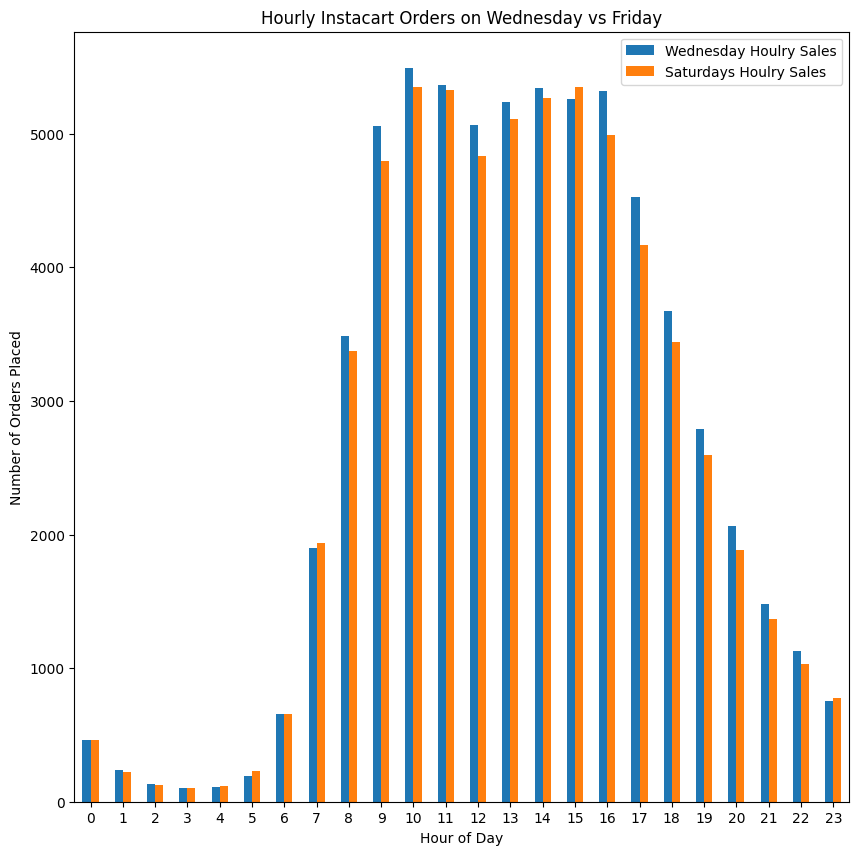

In [32]:
# Plot bar chart with wednesday vs saturdays sales 
# Set configs for bar chart 
hourly_sales_by_day.plot(x = 'order_hour_of_day'
                         , y = ['wednesday_sales','saturday_sales']
                         , title = 'Hourly Instacart Orders on Wednesday vs Friday'
                         , xlabel = 'Hour of Day'
                         , ylabel = 'Number of Orders Placed'
                         , kind = 'bar'
                         , rot = 0
                         , figsize=(10,10)
                         )

# Change legend/series titles
plt.legend(['Wednesday Houlry Sales', 'Saturdays Houlry Sales'])

# Show bar chart
plt.show() 

### [B2] What's the distribution for the number of orders per customer?

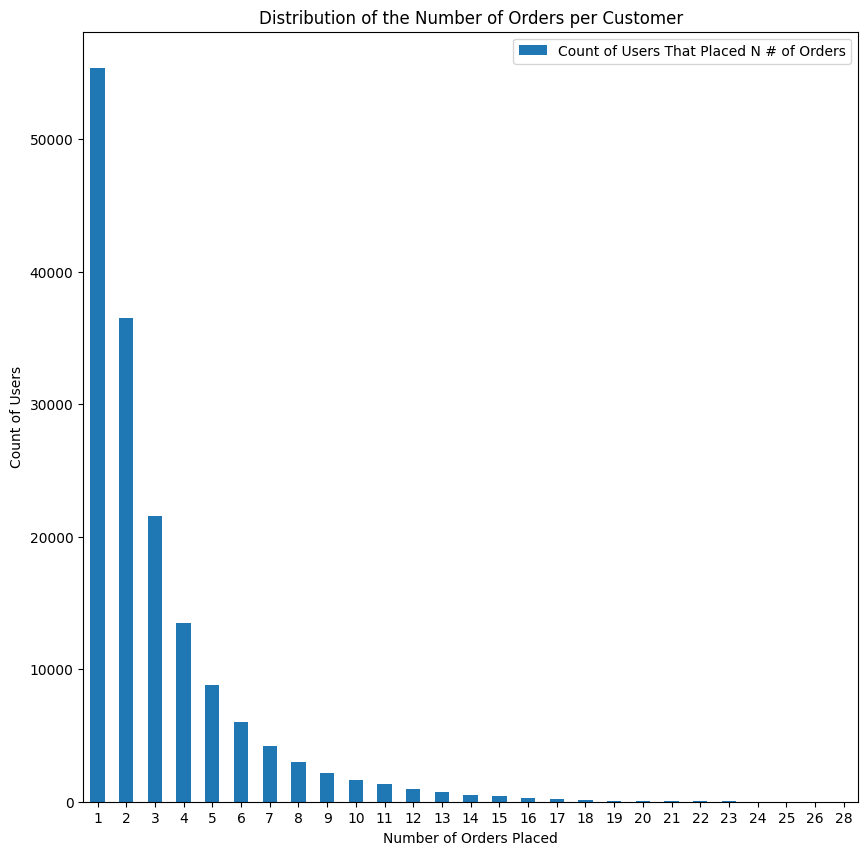

In [33]:
# Determine the number of orders each user has placed
orders_per_user = orders.groupby('user_id')['order_id'].count().to_frame(name = 'order_count').reset_index()

# Determine the count of users by the number of orders placed
user_count_per_orders_place = orders_per_user.groupby('order_count')['user_id'].count().to_frame(name = 'user_count').reset_index()

# Set configs for bar chart 
user_count_per_orders_place.plot(x = 'order_count'
                                 , y = 'user_count'
                                 , title = 'Distribution of the Number of Orders per Customer'
                                 , xlabel = 'Number of Orders Placed'
                                 , ylabel = 'Count of Users'
                                 , kind = 'bar'
                                 , rot = 0
                                 , figsize=(10,10)
                                 )
# Change legend/series titles
plt.legend(['Count of Users That Placed N # of Orders'])

# Show bar chart
plt.show() 

### [B3] What are the top 20 popular products (display their id and name)?

In [34]:
# Assumption -> The most popular products are ones that have been added to orders the most
# Will use order_products dataframe get top 20 product ids by order count 

# Count the number of orders that each product id has been added to and create a df of this aggregation
popular_products = order_products.groupby('product_id')['order_id'].count().to_frame(name = 'order_count').reset_index()

# Sort the purchased products from most purchases to lowest number of purchases (desc)
# Return top twenty most purchased items to top_twenty_products variable
top_twenty_products = popular_products.sort_values(by = 'order_count', ascending = False).head(20)

# Left join the products dataframe to the top_twenty_products df to get the product names for each product id
top_twenty_products = top_twenty_products.merge(products
                                                , how = 'left'
                                                , on = 'product_id')

# Print the top 20 most purchased products with their names and ids
print(top_twenty_products[['product_id','product_name']])

    product_id              product_name
0        24852                    Banana
1        13176    Bag of Organic Bananas
2        21137      Organic Strawberries
3        21903      Organic Baby Spinach
4        47209      Organic Hass Avocado
5        47766           Organic Avocado
6        47626               Large Lemon
7        16797              Strawberries
8        26209                     Limes
9        27845        Organic Whole Milk
10       27966       Organic Raspberries
11       22935      Organic Yellow Onion
12       24964            Organic Garlic
13       45007          Organic Zucchini
14       39275       Organic Blueberries
15       49683            Cucumber Kirby
16       28204        Organic Fuji Apple
17        5876             Organic Lemon
18        8277  Apple Honeycrisp Organic
19       40706    Organic Grape Tomatoes


# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

On average users will purchase 10.1 items per order


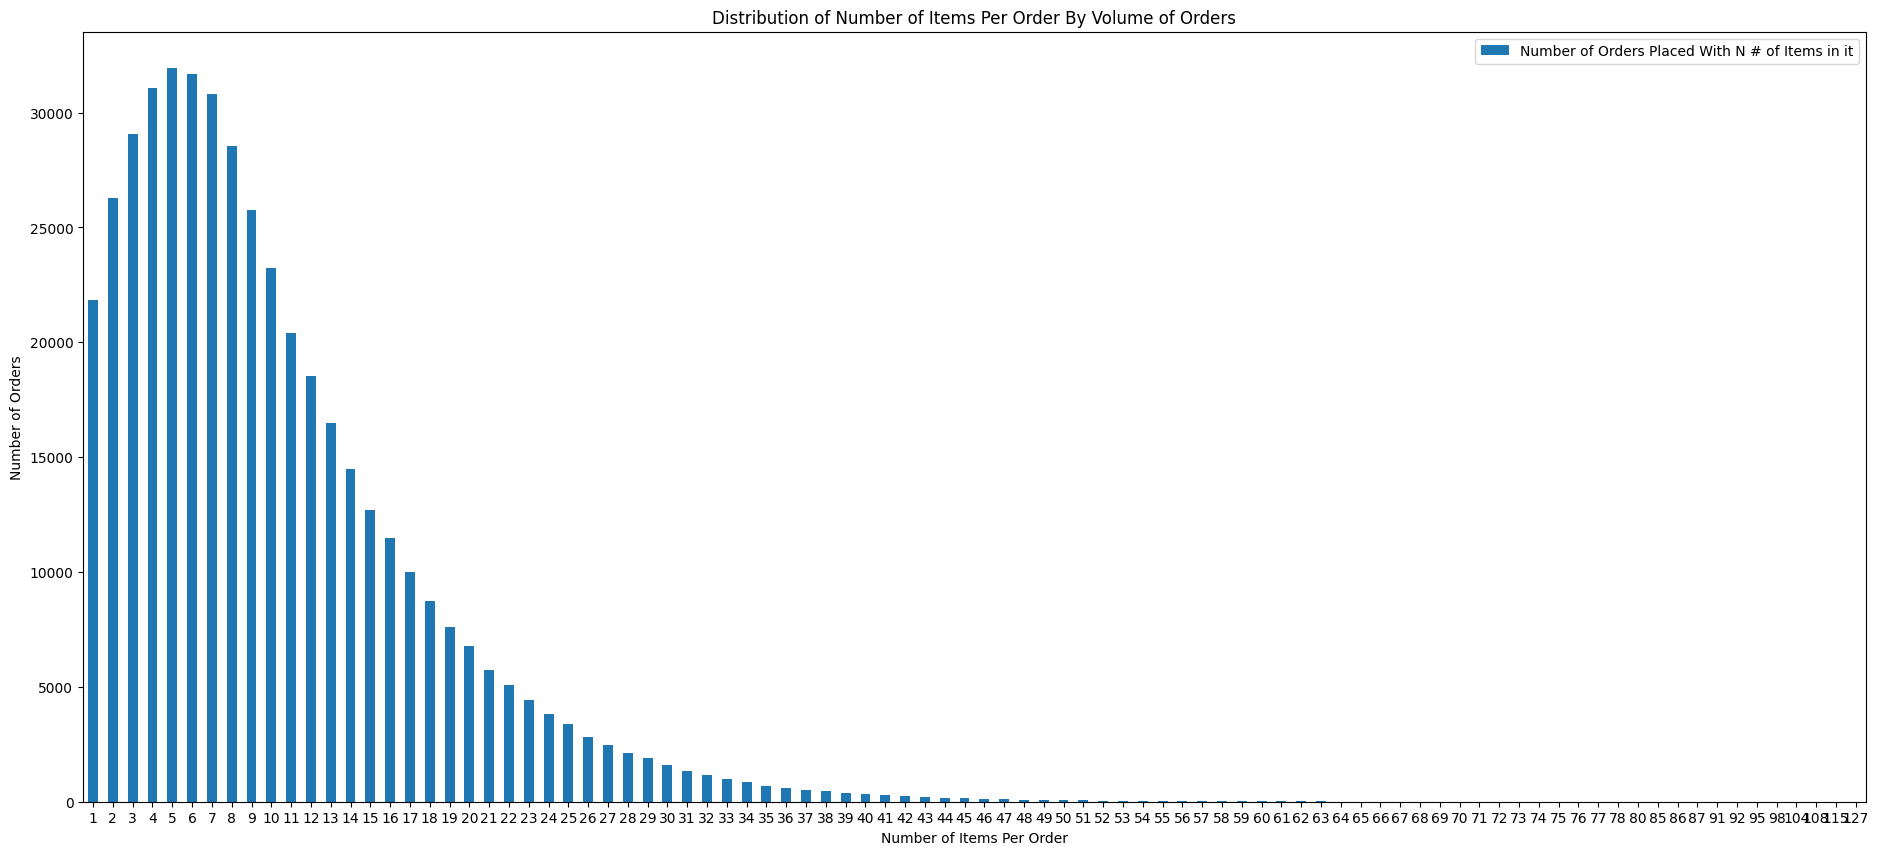

In [35]:
# Determine the number of products in each order
products_per_order = order_products.groupby('order_id')['product_id'].count().to_frame(name = 'product_count').reset_index()

# Determine the volume of orders by the number of items in the order
cart_sizes_by_orders = products_per_order.groupby('product_count')['order_id'].count().to_frame(name = 'num_orders').reset_index()

# Calculate the average number of items per order. Round the average. 
avg_items_per_order = round(products_per_order['product_count'].mean(),2)

# Print a response containing the avg number of items in each order
print('On average users will purchase',avg_items_per_order, 'items per order')

# Set configs for bar chart 
cart_sizes_by_orders.plot(x = 'product_count'
                          , y = 'num_orders'
                          , title = 'Distribution of Number of Items Per Order By Volume of Orders'
                          , xlabel = 'Number of Items Per Order'
                          , ylabel = 'Number of Orders'
                          , kind = 'bar'
                          , rot = 0
                          , figsize=(23,10) #adjust figure size to show all values on x-axis
                          )

# Potential solution for adjusting x-axis tickets to show less ticks and make a less cluttered chart
# plt.xticks(np.arange(0, cart_sizes_by_orders['product_count'].max(), 5)) 

# Change legend/series titles
plt.legend(['Number of Orders Placed With N # of Items in it'])

# Show bar chart
plt.show()#.autofmt_xdate

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

### [C3] For each product, what proportion of its orders are reorders?

In [36]:
# Sum the number of reorders by summing 1 in the reorder column
reorders = order_products.groupby('product_id')['reordered'].sum().to_frame(name = 'reorders').reset_index()

# Count the total number of orders per product (count 1 or 0)
total_orders = order_products.groupby('product_id')['reordered'].count().to_frame(name = 'total_orders').reset_index()

# Left join the products dataframe to the total_orders df to get the product names for each product id
product_counts = total_orders.merge(reorders
                                    , how = 'left'
                                    , on = 'product_id')

# Create a column that calculates the share of reorders for a product out of the total number of orders for that product
# Round share
product_counts['share_of_orders'] = round((product_counts['reorders']/product_counts['total_orders']),2)

# Print out the top 20 most purchased product ids and the proportion of its orders that are reorders ('share_of_orders')
product_counts.sort_values(by = 'total_orders', ascending = False).head(20)

,product_id,total_orders,reorders,share_of_orders
22808,24852,66050,55763,0.84
12025,13176,53297,44450,0.83
19370,21137,37039,28639,0.77
20077,21903,33971,26233,0.77
43271,47209,29773,23629,0.79
43788,47766,24689,18743,0.76
43663,47626,21495,15044,0.70
15364,16797,20018,13945,0.70
24047,26209,19690,13327,0.68
25556,27845,19600,16251,0.83


### [C4] For each customer, what proportion of their products ordered are reorders?

### [C5] What are the top 20 items that people put in their carts first? 

# Instacart Project - Conclusion & Findings

**After checking for missing values and duplicates** in the five tables in the Instantcart data set, I was able to uncover several insights in my exploratory data analysis. Here are a few findings - 

- **Insight 1**: The most popular time of the day to shop is 10 am
- **Insight 2**: The most popular time of the week to shop is Monday
- **Insight 3**: For those users that place multiple orders, on average people tend to wait 11.1 days until placing another order
- **Insight 4**: On average users will purchase 10.1 items per order

Thank you for taking the time to read through my analysis and findings.